In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
%matplotlib inline

In [2]:
df_original = pd.read_csv('Desktop/Thinkful/Austin_crime.csv')
df_original.head(3)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2019891702,CRIMINAL TRESPASS,2716,N,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,03/30/2019,2059.0,...,11.00,C,03/30/2019,NaN,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)"
1,20195013370,THEFT,600,N,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,04/01/2019,1547.0,...,21.07,N,04/03/2019,23H,Theft,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)"
2,20172571868,AGG ROBBERY/DEADLY WEAPON,300,N,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,09/14/2017,2237.0,...,18.04,O,09/20/2017,120,Robbery,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)"


## General Information

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2124418 entries, 0 to 2124417
Data columns (total 27 columns):
Incident Number                int64
Highest Offense Description    object
Highest Offense Code           int64
Family Violence                object
Occurred Date Time             object
Occurred Date                  object
Occurred Time                  float64
Report Date Time               object
Report Date                    object
Report Time                    float64
Location Type                  object
Address                        object
Zip Code                       float64
Council District               float64
APD Sector                     object
APD District                   object
PRA                            object
Census Tract                   float64
Clearance Status               object
Clearance Date                 object
UCR Category                   object
Category Description           object
X-coordinate                   float64
Y-coordin

In [4]:
nRow, nCol = df_original.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 2124418 rows and 27 columns


In [5]:
df = df_original.copy()
del df['Incident Number']
del df['Highest Offense Code']
del df['Family Violence']
del df['Clearance Status']
del df['Council District']
del df['APD Sector']
del df['Census Tract']
del df['UCR Category']

del df['APD District']
del df['PRA']
del df['Clearance Date']

# Missing Values

In [6]:
df.isnull().sum()*100/df.isnull().count()

Highest Offense Description     0.000000
Occurred Date Time              0.007908
Occurred Date                   0.000000
Occurred Time                   0.004048
Report Date Time                0.000047
Report Date                     0.000000
Report Time                     0.000047
Location Type                   0.973067
Address                         0.000565
Zip Code                        0.627325
Category Description           66.399550
X-coordinate                    0.447181
Y-coordinate                    0.447181
Latitude                        1.685497
Longitude                       1.685497
Location                        1.685497
dtype: float64

### 1. Date-time

In [7]:
df[['Occurred Date Time', 'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date', 'Report Time']]

,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time
0,03/30/2019 08:44:00 PM,03/30/2019,2044.0,03/30/2019 08:59:00 PM,03/30/2019,2059.0
1,03/23/2019 06:00:00 PM,03/23/2019,1800.0,04/01/2019 03:47:00 PM,04/01/2019,1547.0
2,09/14/2017 10:37:00 PM,09/14/2017,2237.0,09/14/2017 10:37:00 PM,09/14/2017,2237.0
3,04/02/2019 01:49:00 AM,04/02/2019,149.0,04/02/2019 01:49:00 AM,04/02/2019,149.0
4,03/30/2019 10:36:00 PM,03/30/2019,2236.0,03/30/2019 10:36:00 PM,03/30/2019,2236.0
...,...,...,...,...,...,...
2124413,08/28/2018 07:09:00 PM,08/28/2018,1909.0,08/28/2018 07:47:00 PM,08/28/2018,1947.0
2124414,11/30/2010 03:29:00 PM,11/30/2010,1529.0,11/30/2010 03:29:00 PM,11/30/2010,1529.0
2124415,04/18/2007 08:40:00 PM,04/18/2007,2040.0,04/18/2007 10:43:00 PM,04/18/2007,2243.0
2124416,12/15/2009 05:15:00 PM,12/15/2009,1715.0,12/15/2009 10:38:00 PM,12/15/2009,2238.0


In [8]:
df[df['Report Date Time'].isnull()]

,Highest Offense Description,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2094055,PROSTITUTION,NaN,08/29/2003,NaN,NaN,08/29/2003,NaN,NaN,3600 S CONGRESS AVE,78704.0,NaN,3108710.0,3108710.0,30.227992,-97.761627,"(30.22799205, -97.76162732)"


In [9]:
df[df['Report Date Time'] == 'NaN']

,Highest Offense Description,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location


In [10]:
df['Report Time'] = df['Report Time'].apply(lambda x: 0 if pd.isnull(x) else x)


In [11]:
del df['Occurred Date Time']
del df['Occurred Date']
del df['Occurred Time']


In [12]:
#df['report_dt'] = pd.to_datetime(df['Report Date Time'], format='%m/%d/%Y %I:%M:%S %p')
df['hour']= pd.to_datetime(df['Report Date Time'], format='%m/%d/%Y %I:%M:%S %p').dt.hour
df['year']= pd.to_datetime(df['Report Date'], format='%m/%d/%Y').dt.year

### 2. Location Type

In [13]:
df['Location Type'] = df['Location Type'].apply(lambda x: 'Other' if pd.isnull(x) else x)

### 3. Address

In [14]:
df[df['Address'].isnull()]

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
55320,POSS CONTROLLED SUB/NARCOTIC,04/18/2005 02:53:00 PM,04/18/2005,1453.0,Other,NaN,NaN,NaN,3121801.0,3121801.0,30.269700,-97.719036,"(30.26969963, -97.71903643)",14.0,2005
226945,DWI,08/24/2005 03:03:00 AM,08/24/2005,303.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,3129699.0,3129699.0,30.351737,-97.691766,"(30.35173678, -97.69176609)",3.0,2005
356999,COUNTERFEITING,05/30/2005 01:36:00 PM,05/30/2005,1336.0,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,2005
555911,CRIMINAL TRESPASS,01/20/2007 07:07:00 PM,01/20/2007,1907.0,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,2007
587545,VOCO - ALCOHOL CONSUMPTION,06/28/2008 07:06:00 PM,06/28/2008,1906.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,3115316.0,3115316.0,30.266131,-97.739681,"(30.26613118, -97.73968058)",19.0,2008
674647,CUSTODY ARREST TRAFFIC WARR,01/16/2006 08:30:00 PM,01/16/2006,2030.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2006
817065,WARRANT ARREST NON TRAFFIC,12/07/2010 06:52:00 PM,12/07/2010,1852.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2010
1020451,FRAUD - OTHER,12/13/2009 06:05:00 PM,12/13/2009,1805.0,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2009
1156886,CRIMINAL MISCHIEF,09/23/2005 09:47:00 PM,09/23/2005,2147.0,RESIDENCE / HOME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,2005
1295870,WARRANT ARREST NON TRAFFIC,07/21/2006 09:49:00 AM,07/21/2006,949.0,STREETS / HWY / ROAD / ALLEY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2006


### 4. Zip Code

In [15]:
df['Zip Code'] = df['Zip Code'].apply(lambda x: str(x)[:5])

In [16]:
df[df['Zip Code'] == '0.0'].sort_values(by = 'year')

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
1125271,FAILURE TO IDENTIFY,06/05/2003 05:35:00 PM,06/05/2003,1735.0,STREETS / HWY / ROAD / ALLEY,800 INDIAN MOUND RD,0.0,NaN,2998522.0,2998522.0,30.473163,-98.104946,"(30.47316308, -98.10494576)",17.0,2003
152191,CUSTODY ARREST TRAFFIC WARR,12/26/2003 11:22:00 PM,12/26/2003,2322.0,STREETS / HWY / ROAD / ALLEY,11600 BLOCK N FM 620 RD,0.0,NaN,3086996.0,3086996.0,30.456737,-97.824457,"(30.45673748, -97.82445738)",23.0,2003
1212606,CUSTODY ARREST TRAFFIC WARR,10/30/2003 02:00:00 PM,10/30/2003,1400.0,Other,414 KRAUSE SPRINGS RD,0.0,NaN,2984859.0,2984859.0,30.478606,-98.148203,"(30.47860645, -98.14820274)",14.0,2003
1876881,BURGLARY OF VEHICLE,02/01/2004 07:25:00 PM,02/01/2004,1925.0,COMMERCIAL / OFFICE BUILDING,101 ELIZABETH DR,0.0,Theft,2985563.0,2985563.0,30.517440,-98.145085,"(30.5174404, -98.14508531)",19.0,2004
130107,VIOL OF PARK CURFEW,08/14/2004 10:29:00 PM,08/14/2004,2229.0,GOVERNMENT / PUBLIC BUILDING,400 RUSTIC LN,0.0,NaN,2995332.0,2995332.0,30.474933,-98.115033,"(30.47493284, -98.11503339)",22.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671145,BURGLARY OF VEHICLE,04/17/2008 02:26:00 AM,04/17/2008,226.0,STREETS / HWY / ROAD / ALLEY,100 BLOCK ELIZABETH DR,0.0,Theft,2985563.0,2985563.0,30.517440,-98.145085,"(30.5174404, -98.14508531)",2.0,2008
31167,INDECENCY WITH A CHILD/CONTACT,04/21/2008 02:11:00 PM,04/21/2008,1411.0,RESIDENCE / HOME,11000 BLOCK MARBLE RD,0.0,NaN,0.0,0.0,NaN,NaN,NaN,14.0,2008
1084956,HARASSMENT,02/17/2009 12:31:00 PM,02/17/2009,1231.0,RESIDENCE / HOME,10507 MELLOW MEADOWS,0.0,NaN,3094838.0,3094838.0,30.460815,-97.799454,"(30.46081473, -97.79945431)",12.0,2009
34916,IDENTITY THEFT,02/10/2009 03:26:00 PM,02/10/2009,1526.0,RESIDENCE / HOME,10604 GUNGROVE DR,0.0,NaN,3091653.0,3091653.0,30.448814,-97.809880,"(30.44881416, -97.80988041)",15.0,2009


In [17]:
df[df['Zip Code'] == '0.0'].sort_values(by = 'year').count()

Highest Offense Description    62
Report Date Time               62
Report Date                    62
Report Time                    62
Location Type                  62
Address                        62
Zip Code                       62
Category Description           17
X-coordinate                   62
Y-coordinate                   62
Latitude                       61
Longitude                      61
Location                       61
hour                           62
year                           62
dtype: int64

Just 62 rows and all before 2009 year. Since they aren't recent data we can get rid of them.

In [18]:
df = df[df['Zip Code'] != '0.0']

In [49]:
df = df[df['Zip Code'] != 'nan']

In [19]:
df[df['Zip Code'] == 'nan'].sort_values(by = 'year')

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
1137875,CUSTODY ARREST TRAFFIC WARR,07/16/2003 12:19:00 PM,07/16/2003,1219.0,RESIDENCE / HOME,5108 WEIDERMAN LANE,nan,NaN,NaN,NaN,NaN,NaN,NaN,12.0,2003
758086,POSS OF DRUG PARAPHERNALIA,03/19/2003 04:05:00 AM,03/19/2003,405.0,PARKING LOTS / GARAGE,7631 W US HWY 290,nan,NaN,2774649.0,2774649.0,4.109756,-99.150677,"(4.10975607, -99.15067721)",4.0,2003
450458,UNAUTHORIZED USE VEH-EXPIRED,03/05/2003 08:07:00 AM,03/05/2003,807.0,RESIDENCE / HOME,8220 W STATE HWY 71,nan,NaN,2772846.0,2772846.0,4.123031,-99.154998,"(4.12303067, -99.15499766)",8.0,2003
555961,ASSAULT BY THREAT,07/20/2003 10:50:00 PM,07/20/2003,2250.0,RESIDENCE / HOME,7655 N F M 620,nan,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2003
344261,WARRANT ARREST NON TRAFFIC,04/30/2003 09:18:00 AM,04/30/2003,918.0,PARKING LOTS / GARAGE,7010 W STATE HWY 71,nan,NaN,2775999.0,2775999.0,4.113881,-99.147294,"(4.11388085, -99.1472936)",9.0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177,FAMILY DISTURBANCE/PARENTAL,03/28/2019 06:58:00 PM,03/28/2019,1858.0,RESIDENCE / HOME,1306 QUAILFIELD DR,nan,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2019
244912,PROTECTIVE ORDER,01/31/2019 08:04:00 PM,01/31/2019,2004.0,RESIDENCE / HOME,UNKNOWN,nan,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2019
244763,DATING DISTURBANCE,01/24/2019 08:31:00 PM,01/24/2019,2031.0,RESIDENCE / HOME,6600 ED BLUESTEIN BLVD,nan,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2019
193874,FAMILY DISTURBANCE,01/14/2019 10:29:00 PM,01/14/2019,2229.0,RESIDENCE / HOME,11320 MENCHACA RD,nan,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2019


In [20]:
#df = df[df['Zip Code'] != '0']

In [21]:
#13327 rows we can't delete. So will try to fill values

In [22]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode

### 5. Category Description

In [23]:
df[df['Category Description'].isnull()]

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
0,CRIMINAL TRESPASS,03/30/2019 08:59:00 PM,03/30/2019,2059.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701,NaN,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)",20.0,2019
3,FAMILY DISTURBANCE,04/02/2019 01:49:00 AM,04/02/2019,149.0,RESTAURANTS,7100 N IH 35 SVRD SB,78752,NaN,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)",1.0,2019
4,POSS MARIJUANA,03/30/2019 10:36:00 PM,03/30/2019,2236.0,STREETS / HWY / ROAD / ALLEY,1500 N IH 35 SVRD SB,78701,NaN,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)",22.0,2019
5,DISTURBANCE - OTHER,03/31/2019 04:44:00 PM,03/31/2019,1644.0,RESIDENCE / HOME,6906 CARVER AVE,78752,NaN,3126857.0,3126857.0,30.328285,-97.701419,"(30.3282848, -97.70141883)",16.0,2019
7,FORGERY - OTHER,03/30/2019 05:10:00 PM,03/30/2019,1710.0,COMMERCIAL / OFFICE BUILDING,7514 N MOPAC EXPY SVRD SB,78731,NaN,3112284.0,3112284.0,30.357037,-97.746852,"(30.35703739, -97.74685191)",17.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124411,VIOL OF CAMPING ORDINANCE,09/03/2007 10:11:00 PM,09/03/2007,2211.0,GOVERNMENT / PUBLIC BUILDING,400 COMAL ST,78702,NaN,3119223.0,3119223.0,30.261317,-97.727431,"(30.26131706, -97.72743133)",22.0,2007
2124412,POSS CONTROLLED SUB/NARCOTIC,05/22/2003 10:18:00 PM,05/22/2003,2218.0,FIELD / WOODS,100 RED RIVER ST,78701,NaN,3115558.0,3115558.0,30.261718,-97.739032,"(30.26171751, -97.73903241)",22.0,2003
2124413,FAMILY DISTURBANCE,08/28/2018 07:47:00 PM,08/28/2018,1947.0,RESIDENCE / HOME,1901 ONION CREEK PKWY,78748,NaN,3097240.0,3097240.0,30.137575,-97.800326,"(30.13757481, -97.80032624)",19.0,2018
2124415,CRIMINAL TRESPASS,04/18/2007 10:43:00 PM,04/18/2007,2243.0,RESIDENCE / HOME,1801 E 4TH ST,78702,NaN,3120371.0,3120371.0,30.259833,-97.723834,"(30.25983293, -97.72383422)",22.0,2007


In [24]:
del df['Category Description']

In [25]:
df.dropna()

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
0,CRIMINAL TRESPASS,03/30/2019 08:59:00 PM,03/30/2019,2059.0,GAS / SERVICE STATIONS,900 N IH 35 SVRD SB,78701,3117057.0,3117057.0,30.269060,-97.734085,"(30.26905967, -97.73408544)",20.0,2019
1,THEFT,04/01/2019 03:47:00 PM,04/01/2019,1547.0,RESIDENCE / HOME,5512 GLOUCESTER LN,78723,3133783.0,3133783.0,30.302208,-97.680177,"(30.30220794, -97.6801768)",15.0,2019
2,AGG ROBBERY/DEADLY WEAPON,09/14/2017 10:37:00 PM,09/14/2017,2237.0,STREETS / HWY / ROAD / ALLEY,E ST JOHNS AVE / ROLAND JOHNSON DR,78752,3125442.0,3125442.0,30.333542,-97.705762,"(30.33354183, -97.70576196)",22.0,2017
3,FAMILY DISTURBANCE,04/02/2019 01:49:00 AM,04/02/2019,149.0,RESTAURANTS,7100 N IH 35 SVRD SB,78752,3125614.0,3125614.0,30.332481,-97.705246,"(30.3324806, -97.70524551)",1.0,2019
4,POSS MARIJUANA,03/30/2019 10:36:00 PM,03/30/2019,2236.0,STREETS / HWY / ROAD / ALLEY,1500 N IH 35 SVRD SB,78701,3117721.0,3117721.0,30.274861,-97.731825,"(30.27486103, -97.73182518)",22.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124413,FAMILY DISTURBANCE,08/28/2018 07:47:00 PM,08/28/2018,1947.0,RESIDENCE / HOME,1901 ONION CREEK PKWY,78748,3097240.0,3097240.0,30.137575,-97.800326,"(30.13757481, -97.80032624)",19.0,2018
2124414,BURGLARY OF VEHICLE,11/30/2010 03:29:00 PM,11/30/2010,1529.0,PARKING LOTS / GARAGE,12410 N LAMAR BLVD,78758,3133289.0,3133289.0,30.406682,-97.678869,"(30.40668179, -97.67886904)",15.0,2010
2124415,CRIMINAL TRESPASS,04/18/2007 10:43:00 PM,04/18/2007,2243.0,RESIDENCE / HOME,1801 E 4TH ST,78702,3120371.0,3120371.0,30.259833,-97.723834,"(30.25983293, -97.72383422)",22.0,2007
2124416,BURGLARY OF VEHICLE,12/15/2009 10:38:00 PM,12/15/2009,2238.0,PARKING LOTS / GARAGE,3110 ESPERANZA XING,78758,3119609.0,3119609.0,30.399350,-97.722476,"(30.39935012, -97.72247569)",22.0,2009


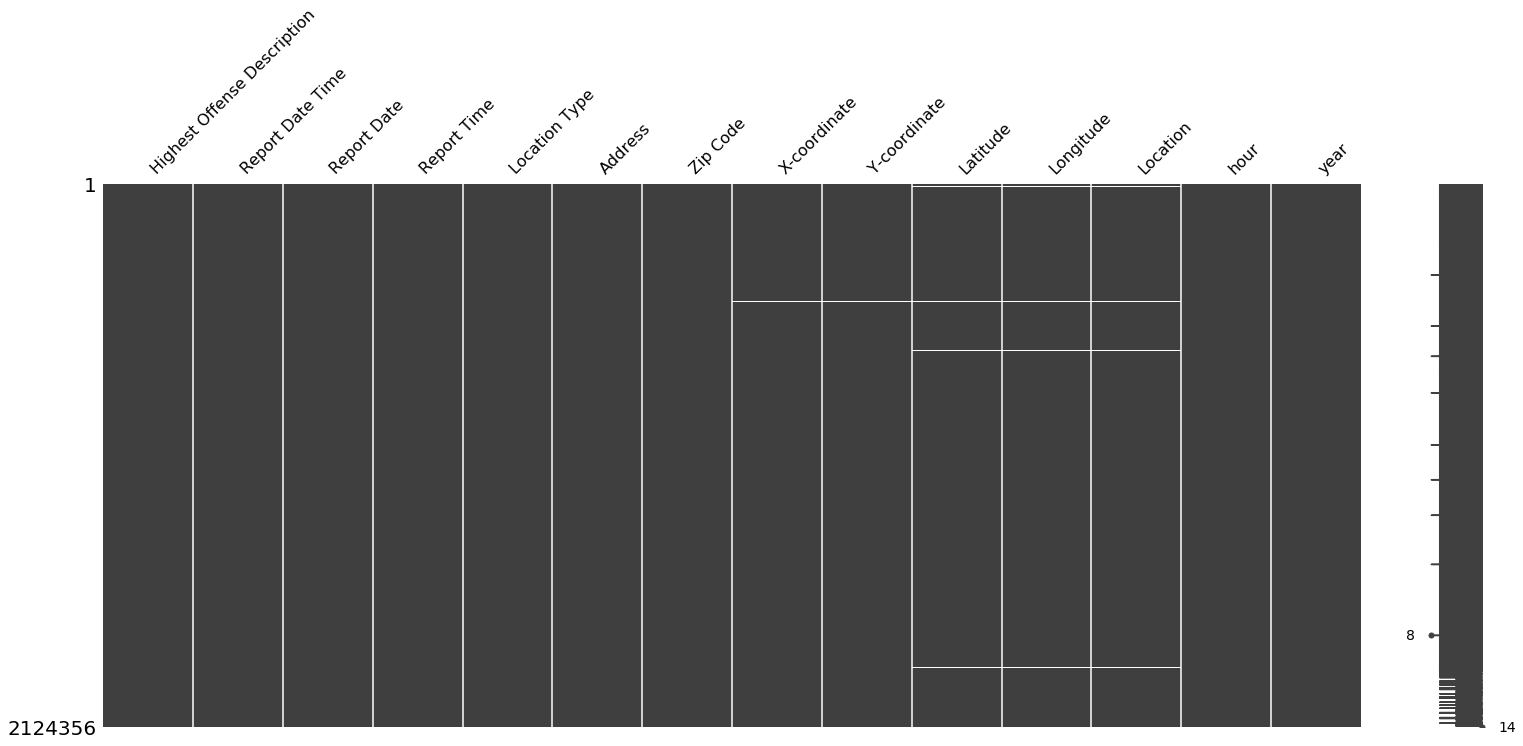

In [26]:
import missingno as msno
#missing values
df.isnull().sum()*100/df.isnull().count()

# Create nullity matrix for missing values 

msno.matrix(df)

In [27]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(axis=0,  inplace=True)

In [28]:
df['Highest Offense Description'].value_counts().head()

BURGLARY OF VEHICLE      212395
THEFT                    196054
FAMILY DISTURBANCE       159805
CRIMINAL MISCHIEF        116751
BURGLARY OF RESIDENCE     73475
Name: Highest Offense Description, dtype: int64

Text(0.5, 1.0, '20 the most committed crimes')

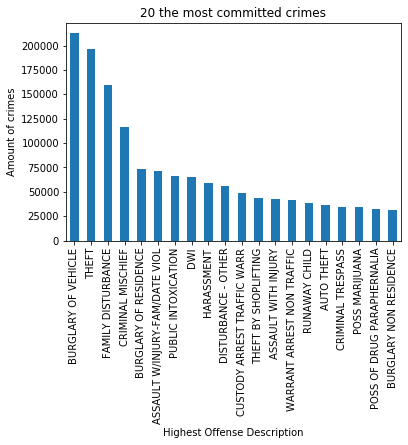

In [29]:
df['Highest Offense Description'].value_counts().head(20).plot(kind='bar')

plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")
plt.title('20 the most committed crimes')

# Crime per year

Text(0.5, 1.0, 'Number of reported crimes per year')

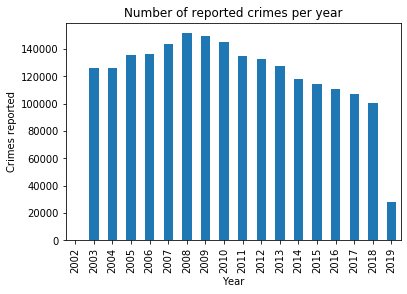

In [30]:
df['year'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel("Year")
plt.ylabel("Crimes reported")
plt.title('Number of reported crimes per year')

Looks like there was a peak in crimes reported in 2008 but since then there's a steady decline. It's interesing to see the most popular crime in 2008.

In [31]:
df[df.year==2008].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5)

Highest Offense Description
THEFT                  15637
BURGLARY OF VEHICLE    14286
FAMILY DISTURBANCE      9279
CRIMINAL MISCHIEF       9092
PUBLIC INTOXICATION     5853
Name: year, dtype: int64

Text(0.5, 1.0, '5 the most popular crimes in 2008')

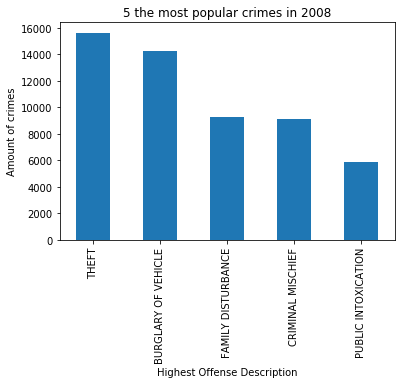

In [32]:
df[df.year==2008].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5).plot(kind = 'bar')

plt.xlabel("Highest Offense Description")
plt.ylabel("Amount of crimes")

plt.title('5 the most popular crimes in 2008')

We see that the most committed crime in 2008 year is the theft.

Let's take a look at the most popular crimes for each year.

In [33]:
for i in np.sort(df.year.unique()):
    print(i)
    print(df[df.year==i].groupby('Highest Offense Description').year.count().sort_values(ascending=False).head(5))



2002
Highest Offense Description
FAMILY DISTURBANCE    1
Name: year, dtype: int64
2003
Highest Offense Description
BURGLARY OF VEHICLE            16111
THEFT                           9434
CRIMINAL MISCHIEF               8239
FAMILY DISTURBANCE              7447
CUSTODY ARREST TRAFFIC WARR     5239
Name: year, dtype: int64
2004
Highest Offense Description
BURGLARY OF VEHICLE            15054
THEFT                          11272
FAMILY DISTURBANCE              7633
CRIMINAL MISCHIEF               7604
CUSTODY ARREST TRAFFIC WARR     5106
Name: year, dtype: int64
2005
Highest Offense Description
BURGLARY OF VEHICLE    15538
THEFT                  11855
FAMILY DISTURBANCE      9177
CRIMINAL MISCHIEF       8926
PUBLIC INTOXICATION     5260
Name: year, dtype: int64
2006
Highest Offense Description
BURGLARY OF VEHICLE    14439
THEFT                  13209
FAMILY DISTURBANCE      9592
CRIMINAL MISCHIEF       8676
PUBLIC INTOXICATION     5607
Name: year, dtype: int64
2007
Highest Offense Descr

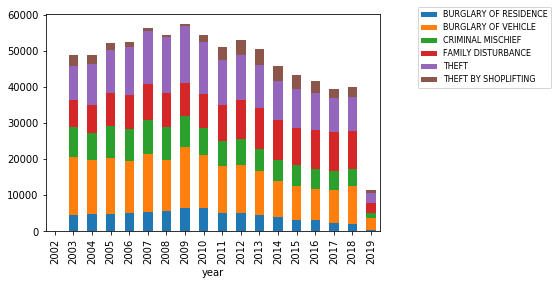

In [34]:
df[df['Highest Offense Description'].\
   isin(['BURGLARY OF VEHICLE', 'THEFT', 'CRIMINAL MISCHIEF','FAMILY DISTURBANCE', 'THEFT BY SHOPLIFTING', 'BURGLARY OF RESIDENCE'])].groupby(['year', 'Highest Offense Description']).Location.count().sort_values(ascending=False).unstack().plot(kind='bar', legend='best', stacked=True)
plt.legend(loc='best', prop={'size': 8}, bbox_to_anchor=(1.1, 1.05))

##### We see that "family disturbance" goes up and we take a look at it more detailed. We will pay attention on "burglary of veicle", "criminal mischief" and "theft".

Let's count how many zipcodes do we have

In [50]:
len(df['Zip Code'].unique())

68

In [96]:
temp_total_crime = df[['Highest Offense Description','Zip Code']].groupby('Zip Code').count().sort_values('Highest Offense Description')

In [97]:
N = df[['Highest Offense Description','Zip Code']].groupby('Zip Code').count().sort_values('Highest Offense Description')

In [102]:
N.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 78654 to 78741
Data columns (total 1 columns):
Highest Offense Description    68 non-null int64
dtypes: int64(1)
memory usage: 1.1+ KB


In [98]:
GN = BN[BN['Highest Offense Description'] < 35956]

In [104]:
GN_zipcode = GN.index

In [114]:
GN_zipcode

Index(['76574', '78610', '78612', '78613', '78615', '78617', '78619', '78620',
       '78621', '78626', '78628', '78634', '78640', '78641', '78642', '78645',
       '78652', '78653', '78654', '78660', '78664', '78669', '78681', '78703',
       '78712', '78713', '78717', '78719', '78722', '78724', '78725', '78726',
       '78727', '78728', '78729', '78730', '78731', '78732', '78733', '78734',
       '78735', '78736', '78737', '78738', '78739', '78742', '78746', '78747',
       '78750', '78754', '78756'],
      dtype='object', name='Zip Code')

In [81]:
GN.describe()

,Highest Offense Description
count,51.000000
mean,7039.941176
std,10079.923995
min,1.000000
25%,18.500000
50%,598.000000
75%,11353.000000
max,34076.000000


In [127]:
crime_coords = df[df['Zip Code'].isin(GN_zipcode)]

In [128]:
crime_coords

,Highest Offense Description,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,X-coordinate,Y-coordinate,Latitude,Longitude,Location,hour,year
7,FORGERY - OTHER,03/30/2019 05:10:00 PM,03/30/2019,1710.0,COMMERCIAL / OFFICE BUILDING,7514 N MOPAC EXPY SVRD SB,78731,3112284.0,3112284.0,30.357037,-97.746852,"(30.35703739, -97.74685191)",17.0,2019
22,THEFT,03/05/2019 09:15:00 PM,03/05/2019,2115.0,RESIDENCE / HOME,12229 OLD STAGE TRL,78750,3095024.0,3095024.0,30.454538,-97.799029,"(30.45453834, -97.79902888)",21.0,2019
24,BURGLARY OF VEHICLE,03/29/2019 06:50:00 PM,03/29/2019,1850.0,PARK / PLAYGROUND,6701 LAKEWOOD DR,78731,3099472.0,3099472.0,30.365915,-97.787250,"(30.3659152, -97.7872499)",18.0,2019
27,TERRORISTIC THREAT,10/14/2016 05:20:00 PM,10/14/2016,1720.0,TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS),3600 PRESIDENTIAL BLVD,78719,3138850.0,3138850.0,30.202008,-97.666884,"(30.20200816, -97.66688447)",17.0,2016
42,DEBIT CARD ABUSE,04/02/2019 01:33:00 PM,04/02/2019,1333.0,RESIDENCE / HOME,12445 ALAMEDA TRACE CIR,78727,3112295.0,3112295.0,30.429247,-97.744879,"(30.42924658, -97.7448792)",13.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124346,BURGLARY OF VEHICLE,01/14/2008 02:45:00 PM,01/14/2008,1445.0,RESIDENCE / HOME,7807 LONESOME DOVE CV,78729,3106317.0,3106317.0,30.443652,-97.763468,"(30.44365239, -97.76346814)",14.0,2008
2124379,VIOL CITY ORDINANCE - OTHER,11/18/2007 08:48:00 PM,11/18/2007,2048.0,STREETS / HWY / ROAD / ALLEY,1000 W 6TH ST,78703,3110764.0,3110764.0,30.271681,-97.753955,"(30.27168071, -97.75395512)",20.0,2007
2124390,PUBLIC INTOXICATION,12/18/2005 10:24:00 PM,12/18/2005,2224.0,STREETS / HWY / ROAD / ALLEY,SAN FELIPE BLVD / MC NEIL DR,78727,3105265.0,3105265.0,30.435200,-97.767033,"(30.43520039, -97.76703256)",22.0,2005
2124393,DAMAGE CITY PROP,11/06/2007 08:52:00 AM,11/06/2007,852.0,STREETS / HWY / ROAD / ALLEY,W PARMER LN / CORPUS CHRISTI DR,78729,3112455.0,3112455.0,30.446697,-97.743903,"(30.44669714, -97.74390255)",8.0,2007


In [130]:
df.to_json('crime_coords.json')